# ***ANURAG***

1. What does the data mean?
2. Data cleaning (remove null values, outlier analysis, etc.)
3. Keeping in mind the broad categories of recommendation system algorithms, what features you will need and why?
4. Perform data visualization on the dataset provided like; popularity of various genres, most rated movies, highest rated movies, least rated movies, etc.

*DATA DISCRIPTION*

In [51]:
import pandas as pd
ratings=pd.read_csv('/content/drive/My Drive/datasets/Ratings .csv')
movies=pd.read_csv('/content/drive/My Drive/datasets/movies.csv')
userdata=pd.read_csv('/content/drive/My Drive/datasets/user_data.csv')

In [53]:
#Shape of datasets:
print('shape of ratings dataset ::',ratings.shape)
print('shape of movies dataset ::',movies.shape)
print('shape of userdata dataset ::',userdata.shape)

shape of ratings dataset :: (1000209, 4)
shape of movies dataset :: (3883, 3)
shape of userdata dataset :: (6040, 5)


In [54]:
print('Ratings columns :',ratings.columns)
print('movies columns :',movies.columns)
print('userdata columns :',userdata.columns)

Ratings columns : Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')
movies columns : Index(['MovieID', 'Title', 'Genres'], dtype='object')
userdata columns : Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')


In [55]:
#merge datasets:: ratings,movies and userdata
d=pd.merge(userdata,ratings,on='UserID',how='left')
df=pd.merge(d,movies,on='MovieID',how='left')
#Now df is merged dataset

In [56]:
num_cols=df.columns
continues= []
categorical =[ ]
for i in num_cols:
  if(len(df[i].unique()))>=(df.shape[0]/25):
     continues.append(i)
  else:
    categorical.append(i)
print ('continue variables',continues,'\n','Categorical Variables',categorical) 

continue variables ['Timestamp'] 
 Categorical Variables ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'MovieID', 'Rating', 'Title', 'Genres']


***4. Perform data visualization on the dataset provided like; popularity of various genres, most rated movies, highest rated movies, least rated movies, etc.***

***Univariate Analysis***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cb57d5630>,
      dtype=object)

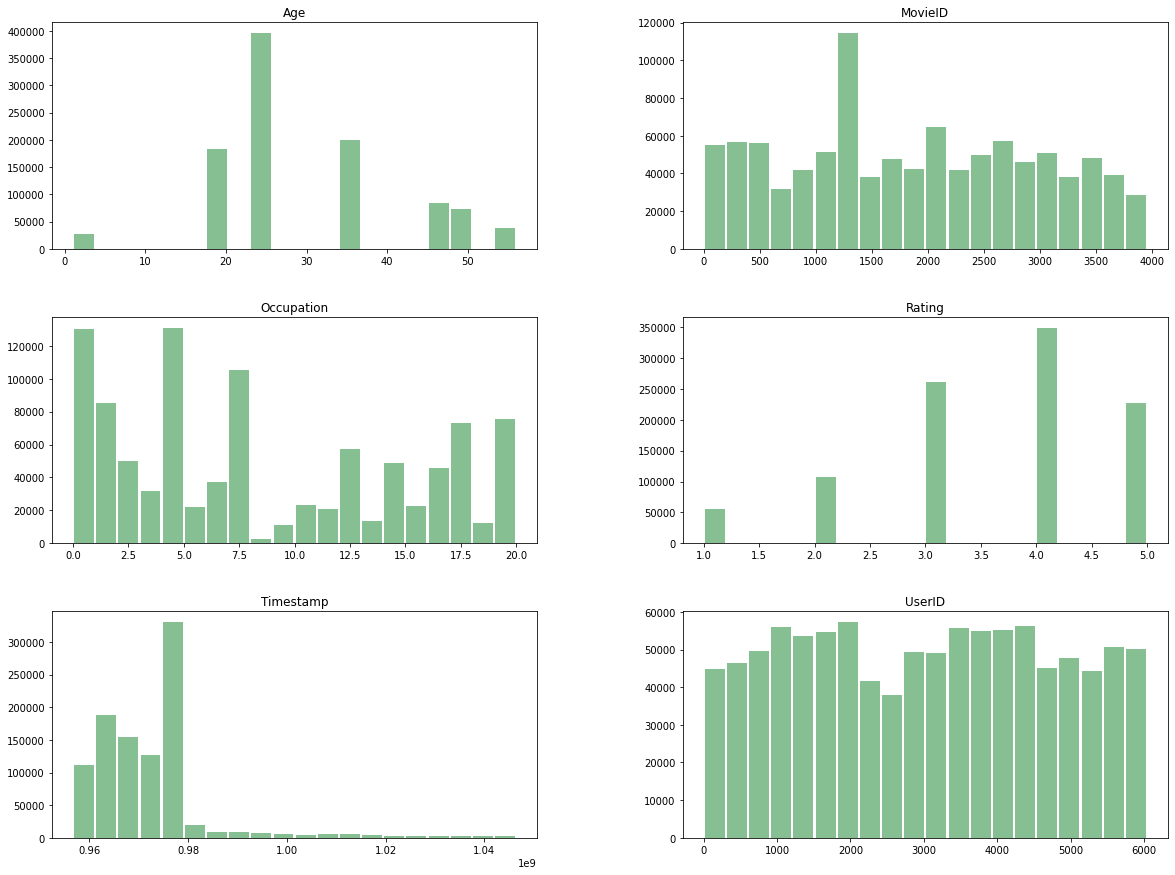

In [57]:
df.hist(figsize=[20,15],bins=20,grid=False,color='#86bf91', zorder=2, rwidth=0.9)

 ***INFRENCES:***


*   There is maximum nuber of use who's age lies between 25 to 30
*   mostly school/grade students other(not specified) occupations's user watched the max of movies
*   maximum of movies are **4-star** Rated
*   Timestamp Histogram shows there is an outlier in dataset
*   Farmers don't like movies compare to other users



***Popularity of various Occupations***

Text(0.5, 0, 'Occupation')

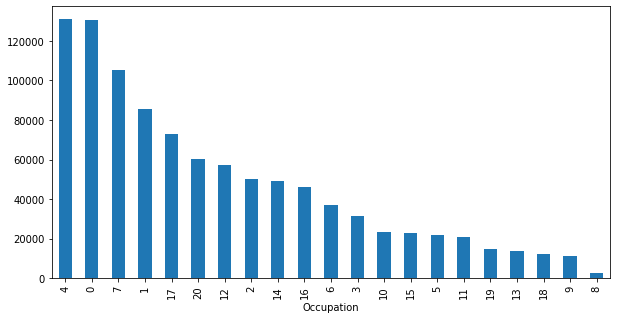

In [58]:
df['Occupation'].value_counts().plot.bar(figsize=[10,5]).set_xlabel('Occupation')
## 4 represents school/grade student ,0= other or not specified
# user who's belongs 4 and 0 occupation has maximum number in dataset

***Bivariate Analysis***

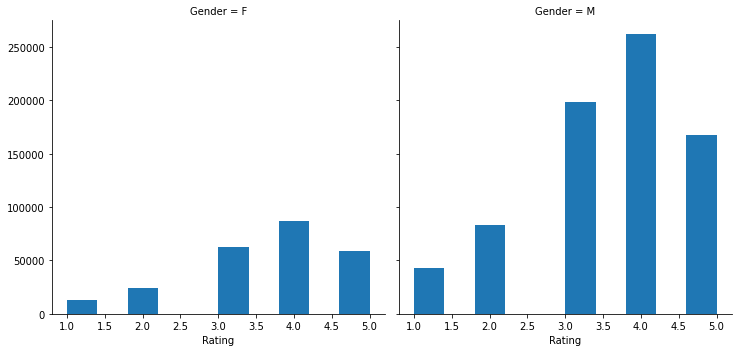

In [59]:
import matplotlib.pyplot as plt
import seaborn as sn
a=sn.FacetGrid(df,col='Gender',col_wrap=4,height=5)
a=a.map(plt.hist,'Rating')

**most of Male user who rate or watched the max of movies**

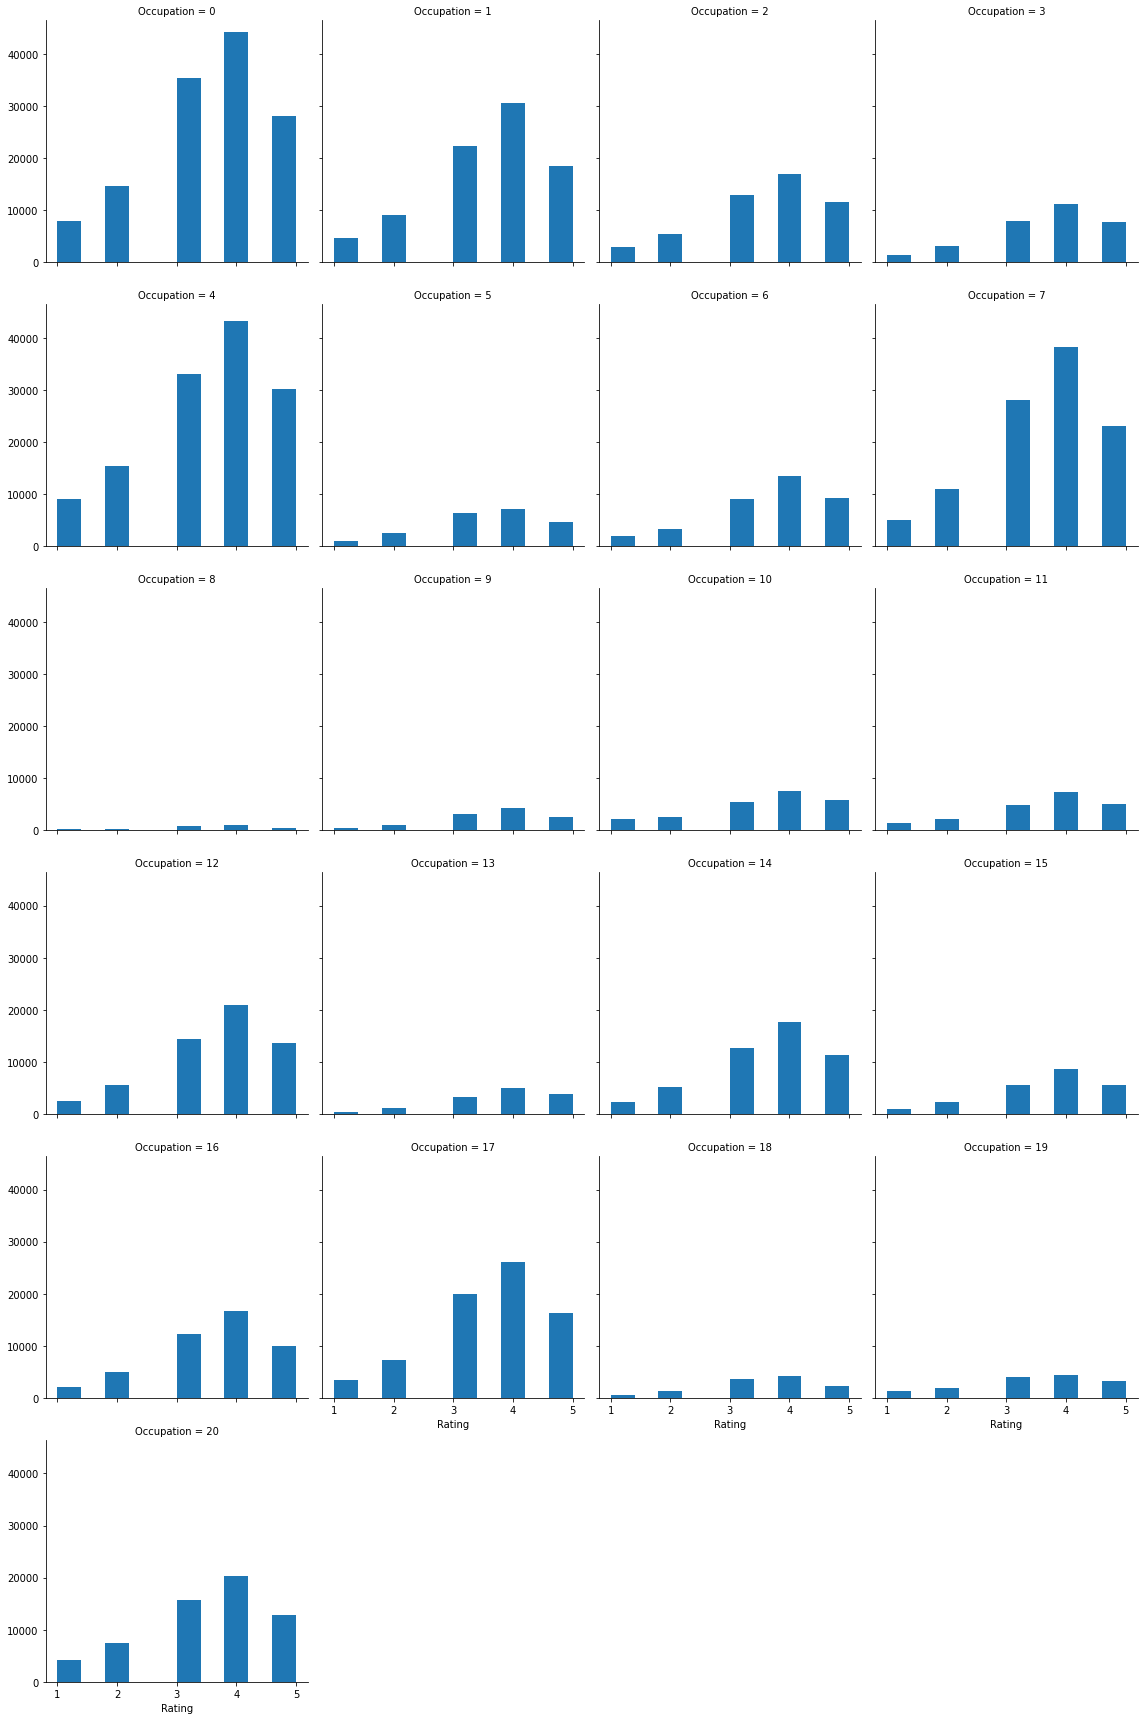

In [60]:
import seaborn as sn
a=sn.FacetGrid(df,col='Occupation',col_wrap=4,height=4)
a=a.map(plt.hist,'Rating')
##graph different occupation vs Rations of movies

In [61]:
split_data,split_data.Genres = df.iloc[[i   for i,j in enumerate(df['Genres']) for value in j.split("|")] , :],[value for i in df['Genres'] for value in i.split("|")]
split_data.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Children's
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Children's
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Comedy


In [62]:
#Average Rated Genres
import numpy as np
r= split_data.groupby(['Genres'], as_index=False)['Rating'].aggregate(np.mean)
r.head(10).sort_values(by='Rating',ascending=False)

,Genres,Rating
9,Film-Noir,4.075188
6,Documentary,3.933123
7,Drama,3.766332
5,Crime,3.708679
2,Animation,3.684868
4,Comedy,3.522099
0,Action,3.491185
1,Adventure,3.477257
8,Fantasy,3.447371
3,Children's,3.422035


Comedy         356580
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72186
War             68527
Animation       43293
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
Name: Genres, dtype: int64

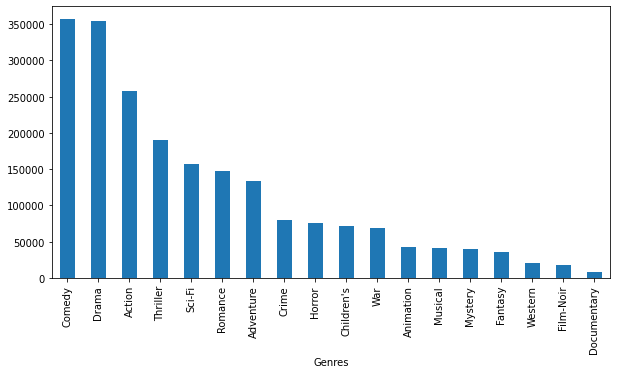

In [63]:
m=split_data['Genres'].value_counts().plot.bar(figsize=[10,5]).set_xlabel('Genres')
split_data['Genres'].value_counts()
## Count the movies's Genres

***Most rated movies***

In [64]:
#Top 10 most rated movies
h=df.groupby('Title').count().sort_values(ascending=False,by='Rating')[['Rating']]
h.head(10)

,Rating
Title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
Saving Private Ryan (1998),2653
Terminator 2: Judgment Day (1991),2649
"Matrix, The (1999)",2590
Back to the Future (1985),2583


In [65]:
df.groupby('Rating').count()[['Title']]
#count different rated movies

,Title
Rating,
1,56174
2,107557
3,261197
4,348971
5,226310


In [66]:
split_data.groupby('Genres').count()[['Title']].sort_values(by='Genres',ascending=True)
#Total no. of movies in each categories/Genres

,Title
Genres,
Action,257457
Adventure,133953
Animation,43293
Children's,72186
Comedy,356580
Crime,79541
Documentary,7910
Drama,354529
Fantasy,36301


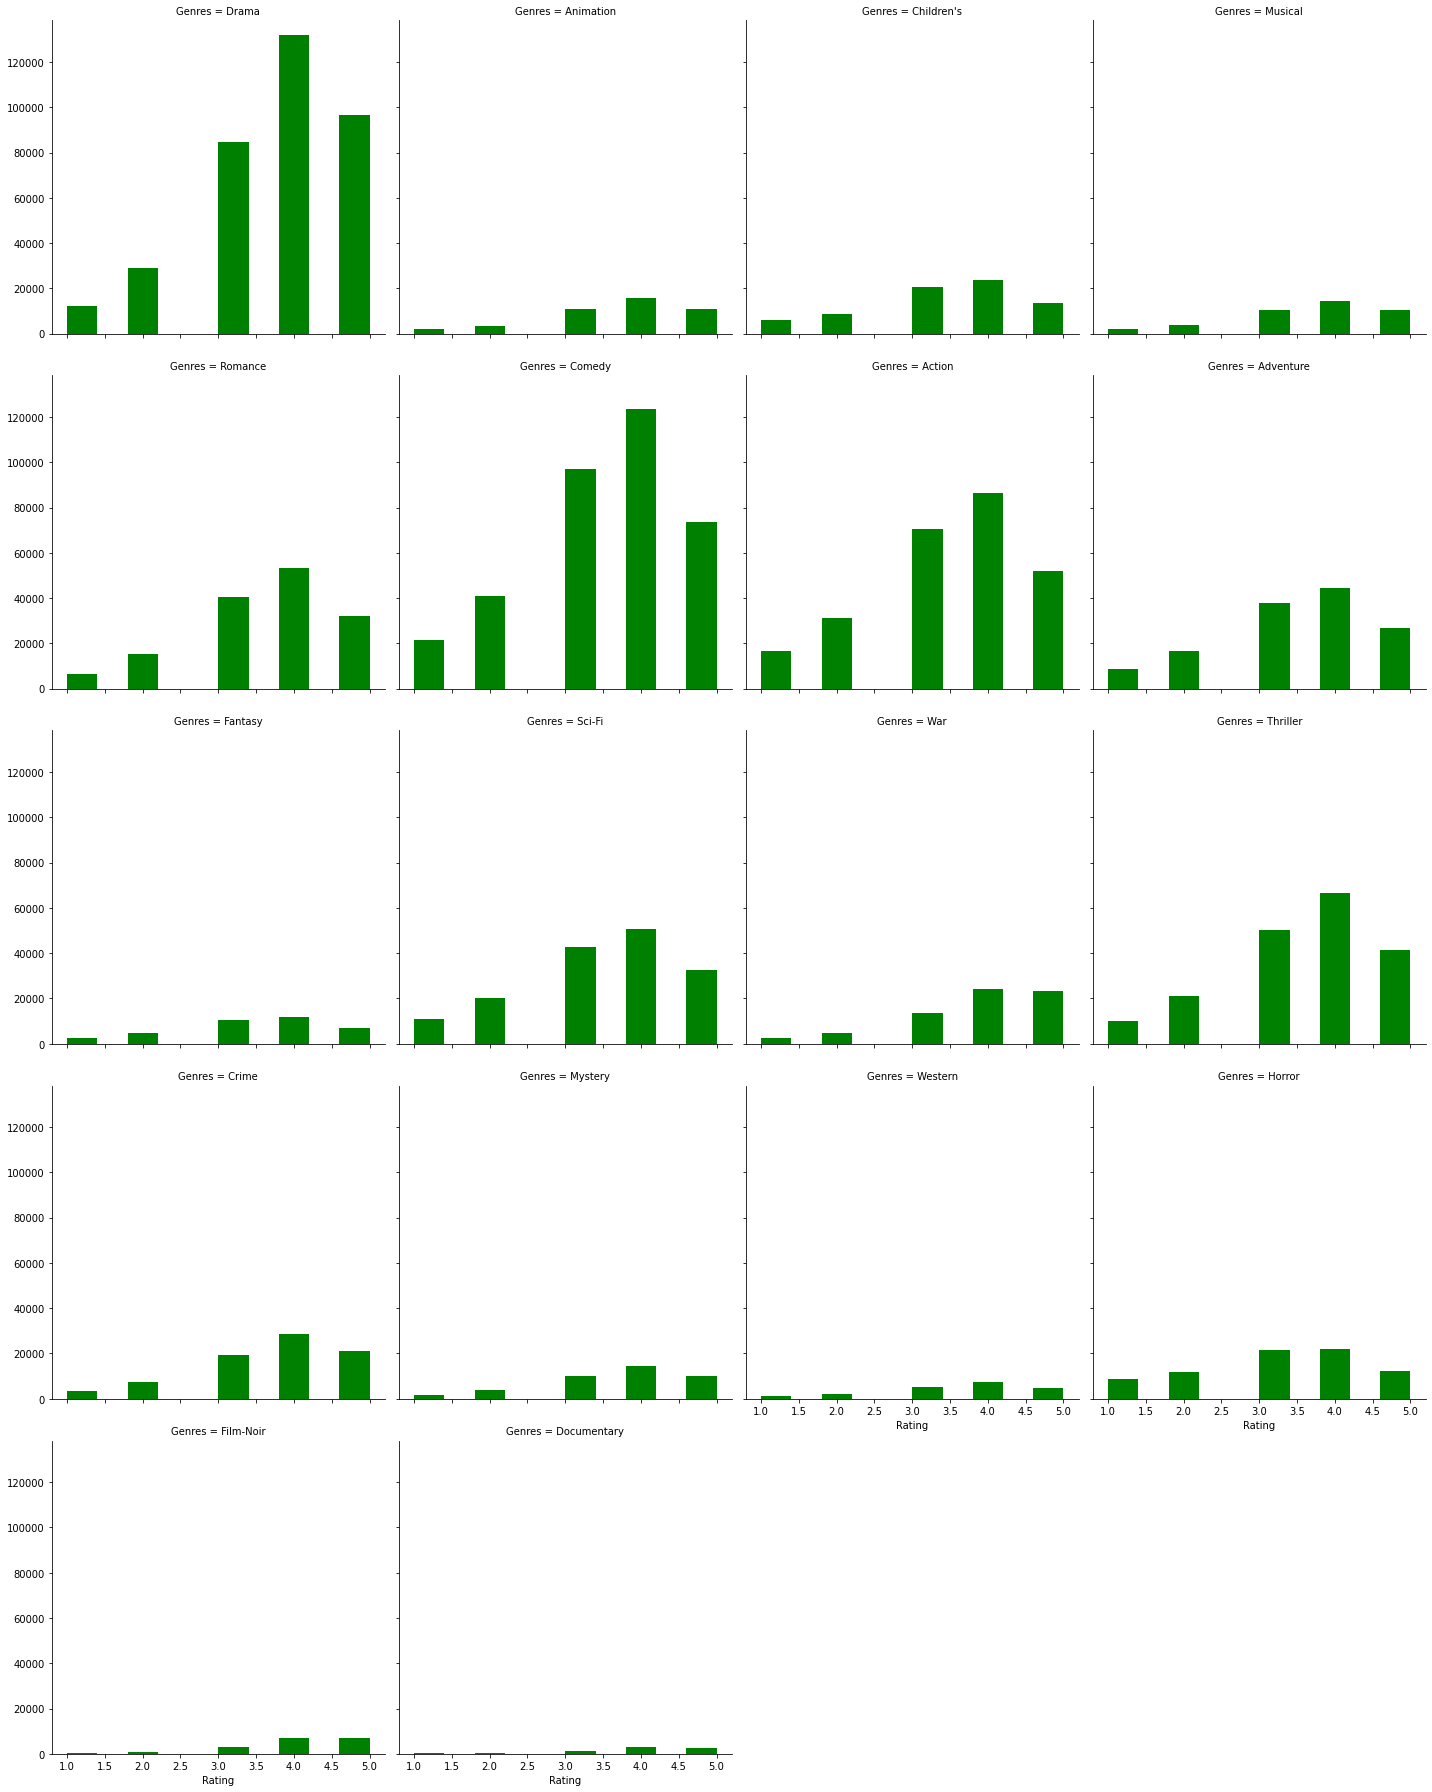

In [68]:
import matplotlib.pyplot as plt
import seaborn as sn
a=sn.FacetGrid(split_data,col='Genres',col_wrap=4,height=5,)
a=a.map(plt.hist,'Rating',color='g')
#Graph between different Genres and Ratngs

***Infrences***

*  **Drametic** and **Comedy** movies are liked by users
*  And Documentry don't liked by users in dataset

***Highest rated movies***

In [106]:
hr= df['Rating']>4
s=df[hr].head(10)
#Top 10 Highest Rated movies
s

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
6,1,F,1,10,48067,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama
7,1,F,1,10,48067,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama
10,1,F,1,10,48067,595,5,978824268,Beauty and the Beast (1991),Animation|Children's|Musical
14,1,F,1,10,48067,1035,5,978301753,"Sound of Music, The (1965)",Musical
18,1,F,1,10,48067,3105,5,978301713,Awakenings (1990),Drama
22,1,F,1,10,48067,1270,5,978300055,Back to the Future (1985),Comedy|Sci-Fi
23,1,F,1,10,48067,527,5,978824195,Schindler's List (1993),Drama|War
25,1,F,1,10,48067,48,5,978824351,Pocahontas (1995),Animation|Children's|Musical|Romance


In [111]:
alt.Chart(s).mark_bar().encode(y='Title',color='Title',column='Rating')

alt.Chart(...)

***Least rated movies***

In [113]:
#Top 5 least Rated movies
lr= df['Rating']<4
df[lr].head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
5,1,F,1,10,48067,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
16,1,F,1,10,48067,2687,3,978824268,Tarzan (1999),Animation|Children's
20,1,F,1,10,48067,2321,3,978302205,Pleasantville (1998),Comedy


In [71]:
#unique movie genre
u_Genres=split_data['Genres'].unique().tolist()
print([u_Genres])
print('Total Movie Genres:',len(u_Genres))

[['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller', 'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir', 'Documentary']]
Total Movie Genres: 18


In [74]:
#top 25 most rated movies
most_rated = df.groupby('Title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [72]:
# here we extract year from title
d['year'] =df['Title'].str.extract('.*\((.*)\).*',expand = False)
d.head(5)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,year
0,1,F,1,10,48067,1193,5,978300760,1975
1,1,F,1,10,48067,661,3,978302109,1996
2,1,F,1,10,48067,914,3,978301968,1964
3,1,F,1,10,48067,3408,4,978300275,2000
4,1,F,1,10,48067,2355,5,978824291,1998


***2. Data cleaning (remove null values, outlier analysis, etc.***


***Handling Missing values***

In [120]:
#Detect Misiing or Null Values
#Missing data percentage list
import numpy as np
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
print('\n')
print('Count NUll values : ')
df.isnull().sum()

UserID - 0.0%
Gender - 0.0%
Age - 0.0%
Occupation - 0.0%
Zip-code - 0.0%
MovieID - 0.0%
Rating - 0.0%
Timestamp - 0.0%
Title - 0.0%
Genres - 0.0%


Count NUll values : 


UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
dtype: int64

**So in Dataset there is no any missing value*

***Handling Outliers***

In [122]:
df.mode().iloc[0]

UserID                          4169
Gender                             M
Age                               25
Occupation                         4
Zip-code                       94110
MovieID                         2858
Rating                             4
Timestamp                  975528402
Title         American Beauty (1999)
Genres                        Comedy
Name: 0, dtype: object

In [123]:
Num_cols=df._get_numeric_data()
Num_cols.head(2)

,UserID,Age,Occupation,MovieID,Rating,Timestamp
0,1,1,10,1193,5,978300760
1,1,1,10,661,3,978302109


In [125]:
Num_F=['UserID','Age','Occupation','MovieID','Rating','Timestamp']
df[Num_F].skew()

UserID        0.005735
Age           0.398471
Occupation    0.404363
MovieID       0.092436
Rating       -0.553610
Timestamp     2.765691
dtype: float64

*Here we see only Timestamp has ouliers and other features skewness is bearable

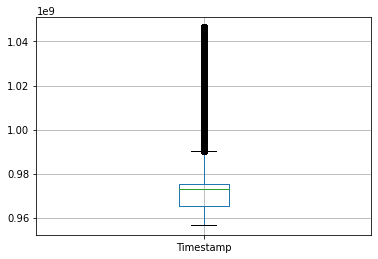

In [126]:
df.boxplot(column='Timestamp')

In [129]:
#IOR Treatmnet for outliers
df['Timestamp'] = np.where(df['Timestamp'] <int(df['Timestamp'].quantile(0.05)), int(df['Timestamp'].quantile(0.1)),df['Timestamp'])
df['Timestamp'] = np.where(df['Timestamp'] >int(df['Timestamp'].quantile(0.97)), int(df['Timestamp'].quantile(0.9)),df['Timestamp'])

UserID        0.005735
Age           0.398471
Occupation    0.404363
MovieID       0.092436
Rating       -0.553610
Timestamp    -0.156723
dtype: float64

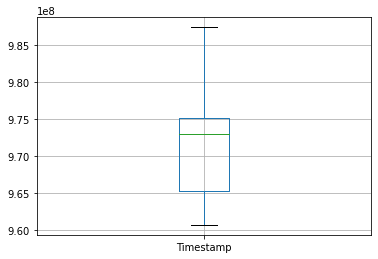

In [130]:
df.boxplot(column='Timestamp')
df[Num_F].skew()

***3. Keeping in mind the broad categories of recommendation system algorithms, what features you will need and why?***

*Label Encoding*

In [131]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_=df.copy()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
le_df.head()

,Title,Genres,Gender,Zip-code,UserID,Age,Occupation,MovieID,Rating,Timestamp
0,2452,239,0,1429,1,1,10,1193,5,978300760
1,1739,152,0,1429,1,1,10,661,3,978302109
2,2289,282,0,1429,1,1,10,914,3,978301968
3,1054,239,0,1429,1,1,10,3408,4,978300275
4,557,145,0,1429,1,1,10,2355,5,978824291


In [132]:
corr = le_df.corr()
corr.head()

,Title,Genres,Gender,Zip-code,UserID,Age,Occupation,MovieID,Rating,Timestamp
Title,1.000000,-0.063523,0.000972,0.003718,-0.000375,-0.008961,-0.000030,-0.015053,0.012247,-0.001234
Genres,-0.063523,1.000000,-0.073500,-0.014125,0.004665,0.059269,-0.015023,0.029295,0.060061,0.016395
Gender,0.000972,-0.073500,1.000000,-0.015056,-0.035042,-0.003189,0.114974,0.021626,-0.019861,0.022001
Zip-code,0.003718,-0.014125,-0.015056,1.000000,-0.044845,0.003513,0.035743,0.000758,0.000776,0.028769
UserID,-0.000375,0.004665,-0.035042,-0.044845,1.000000,0.034688,-0.026698,-0.017739,0.012303,-0.843524


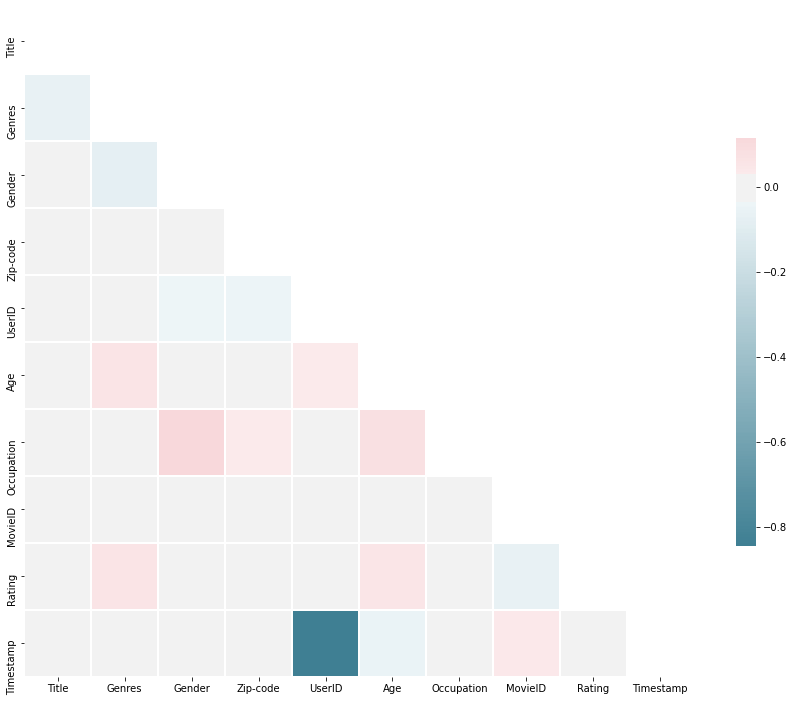

In [136]:
import numpy as np
from matplotlib import pyplot as plt
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

***Infences:***
*   A score closer to 1 or -1 is a positive or negative relationship. A perfect score of 1 is a direct correlation.
*  in this heat map very light pink means positive, dark voilet means negative. The stronger the color, the larger the correlation magnitude.
*  So by analyzing the above heatmap and correlation matrix ***Timestamp*** and ***Zip-code*** has very negative value ***(-0.843524) ,(-0.044845)*** and it goes on -1 side it negative correlation with other so we can think about to Drop it from dataset because it not contribute much information as comapare to others.

*  And also if think about categories of recommendatiomns systems both are not contribute much as we need Because in ***Content Based Filtering*** we needs user related information which relate it to recommend movies and ***Collaborative filtering*** is based on the assumption that people who agreed in the past will agree in the future and that they will like similar kind of objects as they liked in the past So according to this scenario we don"t need these features.

***1. What does the data mean?***

It is MovieLens 1M Dataset provided by **Grouplenc.org.**
here 1,000,209 user ratings of 3883 movies 
made by 6,040 users.

Here we have 3 diffrent datasets:
* **Movies Dataset:** It contains following columns
  *  MovieID: Each movies has a Unique ID 
  *  Title: Titles(Name) of Movies
  *  Genres: Category of Movies(like: Drama, Comedy, Action etc..)
  *  **Shape** : (3883,3)

* **User Datasets:** It Contains following
  *  UserID: Each user who rate the movies has an unique ID
  *  Age: Age of user (*1*:"Under 18", *18*:"18-24", *25*:"25-34", *35*:"35-44", *45*:"45-49", *50*:"50-55, *56*:"56+")
  *  Gender: User'Gender(M or F)
  *  Occupation: It ranges(0-20) each number has represent Occupation of a particular of a User
  *   Zip-code: Area or Zip code of a user
  *  **Shape:** (6040,5)

* **Rating Datasets:**
  *  UserIDs: ranges(1 to 6040)
  *  MovieIDs: range between 1 and 3952
  *  Ratings:   1-5-star rating by user
  *  Timestamp: Represented the time mentioned in seconds when the rating was provided
  *  **Shape:** (1000209,4)


*  All these datasets merge in dataframe based on common column between them,merged datasets **Shape** is **(1000209,10)**
    *  so by using this large dataset we train our model
    and apply it to make a good recommendation system
It shows that one user rate more tFhen one movies so these rows increased
    *  By above analysis the User most like **Drama** and **Comedy** Genres's Movies.

    *  And there is school/grade_student watched the movies mostly.

